In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
%config InlineBackend.figure_format = 'svg'

## Exploratory Data Analysis

In [3]:
ratings_df = pd.read_csv("cleaned_100k/ratings.csv")
movies_df=  pd.read_csv("cleaned_100k/movies.csv")
users_df= pd.read_csv("cleaned_100k/users.csv")

In [4]:
users_df.head()

,UserID,MovieID,tag,Timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
users_df.describe()

,UserID,MovieID,Timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [7]:
movies_df

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
movies_df.describe()

,MovieID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,9742.000000,9742.000000,9742.000000,9742.000000,9742.0,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000
mean,42200.353623,0.187641,0.129645,0.062718,0.0,0.385547,0.123075,0.045165,0.447649,0.079963,0.008930,0.100390,0.034285,0.058817,0.163827,0.100595,0.194416,0.039212,0.017142
std,52160.494854,0.390445,0.335930,0.242468,0.0,0.486749,0.328541,0.207677,0.497277,0.271250,0.094083,0.300535,0.181968,0.235295,0.370137,0.300808,0.395771,0.194108,0.129808
min,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3248.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7300.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76232.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,193609.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
ratings_df.groupby('Rating').size()

Rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
dtype: int64

In [11]:
movies_df.columns

Index(['MovieID', 'Title', 'Genres', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [12]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [13]:
genres = list(movies_df)[2:]
merge  = pd.merge(movies_df,ratings_df,on='MovieID')
merged  = merge.drop(labels=['Title','Timestamp'],axis=1)
ratings = [1,2,3,4,5]
final_count  = []
for genre in genres:
    for rating in ratings:
        genre_count = merged[merged[genre]==1]
        genre_rating_count = len(genre_count[genre_count['Rating']== rating])
        final_count.append([genre,rating,genre_rating_count])
def get_count(rating):
    rating_count =  []
    for genre in genres:
        for ele in final_count:
            if ele[1] == rating  and ele[0] == genre:
                rating_count.append(ele[2])
    return rating_count
total_count = []
for genre in genres:
    count  = 0
    for ele in final_count:
        if ele[0] == genre:
            count += ele[2]
    total_count.append(count)
Ratings_Genres = pd.DataFrame({'Genres': genres , 'Rating_1':get_count(1),'Rating_2':get_count(2),'Rating_3':get_count(3),'Rating_4':get_count(4),'Rating_5':get_count(5),'Total_count':total_count})
Ratings_Genres['Average_rating'] =  (Ratings_Genres['Rating_1'] + (Ratings_Genres['Rating_2']  * 2) +  (Ratings_Genres['Rating_3'] * 3)  +  (Ratings_Genres['Rating_4'] * 4)  +  (Ratings_Genres['Rating_5'] * 5))/ Ratings_Genres['Total_count']            
Ratings_Genres



,Genres,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5,Total_count,Average_rating
0,Genres,0,0,0,0,0,0,NaN
1,Action,904,2548,6331,7678,3750,21211,3.510207
2,Adventure,627,1769,4838,6392,3150,16776,3.576359
3,Animation,116,346,1279,1988,985,4714,3.717013
4,Children's,0,0,0,0,0,0,NaN
5,Comedy,1317,3405,8306,9659,4429,27116,3.460171
6,Crime,321,982,3116,4621,2687,11727,3.713823
7,Documentary,16,33,163,415,153,780,3.841026
8,Drama,795,2339,7541,12360,6350,29385,3.719108
9,Fantasy,286,893,2364,2988,1518,8049,3.566406


<Axes: xlabel='Genres'>

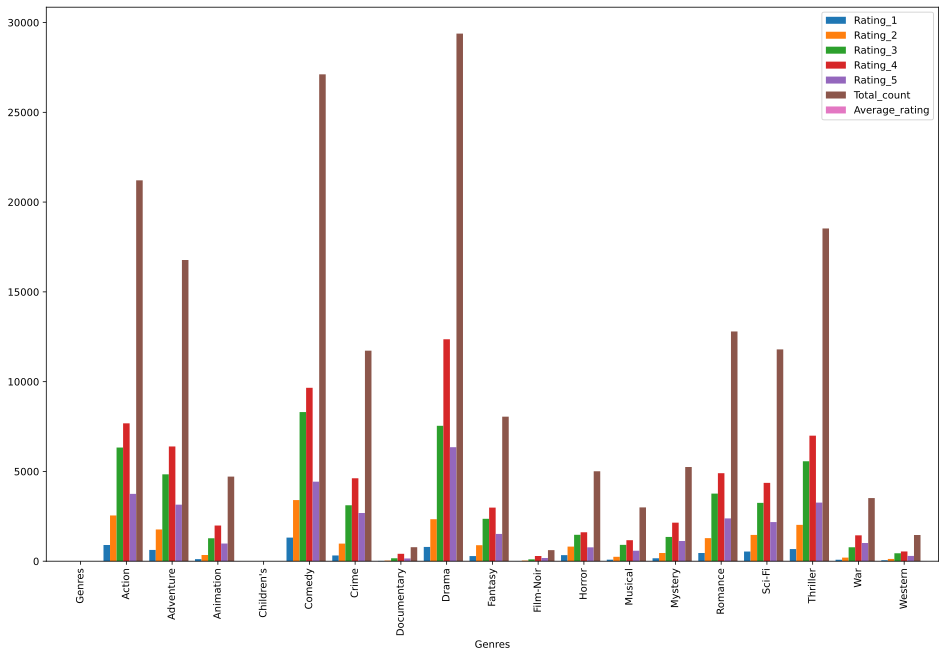

In [14]:

Ratings_Genres.plot(kind =  'bar',x='Genres',figsize=(16,10),width=1)


In [15]:
sum(Ratings_Genres["Rating_1"])

6789

([<matplotlib.patches.Wedge at 0x24620d61c00>,
 [Text(1.1122958671691139, 0.13114077885428754, 'Rating_1'),
  Text(0.9473169293632095, 0.5974869331975889, 'Rating_2'),
  Text(-0.235130155782129, 1.0950405516883255, 'Rating_3'),
  Text(-0.8308932640918777, -0.7510102420651434, 'Rating_4'),
  Text(0.9230933193325638, -0.6342702293215329, 'Rating_5')])

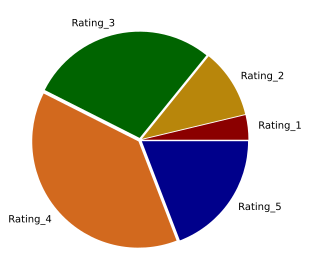

In [16]:
def get_rating_count(rating):
    return sum(Ratings_Genres[rating])/sum(total_count)
labels = ['Rating_1','Rating_2','Rating_3','Rating_4','Rating_5']
fig,axs  = plt.subplots()
axs.pie([get_rating_count(rating) for rating in labels],labels=labels, explode=(0.02, 0.02, 0.02, 0.02, 0.02), colors=['darkred', 'darkgoldenrod',
                                                                                  'darkgreen', 'chocolate', 'darkblue'])

<Axes: xlabel='Rating_year', ylabel='Count'>

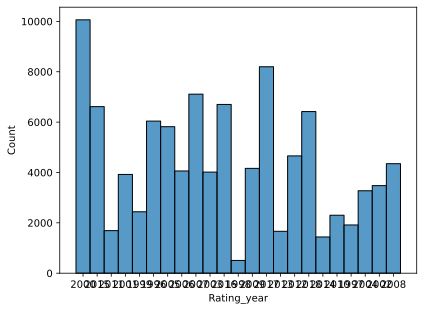

In [17]:
def convert_years(timestamp):
    years_str  = time.ctime(timestamp)
    year_s =years_str.split(sep=" ")
    year = int(year_s[-1])
    return  year
ratings_df['Rating_year'] =ratings_df['Timestamp'].map(convert_years)
sns.histplot(ratings_df['Rating_year'].map(lambda x: str(x)))

<Axes: xlabel='Rating_year'>

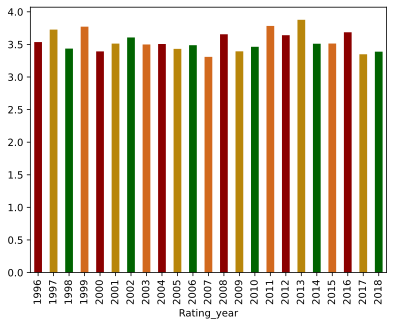

In [18]:
ratings_df.groupby('Rating_year')['Rating'].mean().plot(kind='bar',color =['darkred', 'darkgoldenrod', 'darkgreen', 'chocolate'] )
